In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("Set1")

In [3]:
wdp_z = []
wdx_z = []
wdd_z = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z.append(wgp)
    wdx_z.append(wgx)
    wdd_z.append(wgg)

In [4]:
wdp_z_spi = []
wdx_z_spi = []
wdd_z_spi = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_SPI_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_SPI_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z_spi.append(wgp)
    wdx_z_spi.append(wgx)
    wdd_z_spi.append(wgg)

In [5]:
wdp_z_ell = []
wdx_z_ell = []
wdd_z_ell = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_ELL_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_ELL_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z_ell.append(wgp)
    wdx_z_ell.append(wgx)
    wdd_z_ell.append(wgg)

In [6]:
wdp_z = np.array(wdp_z); wdx_z = np.array(wdx_z); wdd_z = np.array(wdd_z)
wdp_z_spi = np.array(wdp_z_spi); wdx_z_spi = np.array(wdx_z_spi); wdd_z_spi = np.array(wdd_z_spi)
wdp_z_ell = np.array(wdp_z_ell); wdx_z_ell = np.array(wdx_z_ell); wdd_z_ell = np.array(wdd_z_ell)

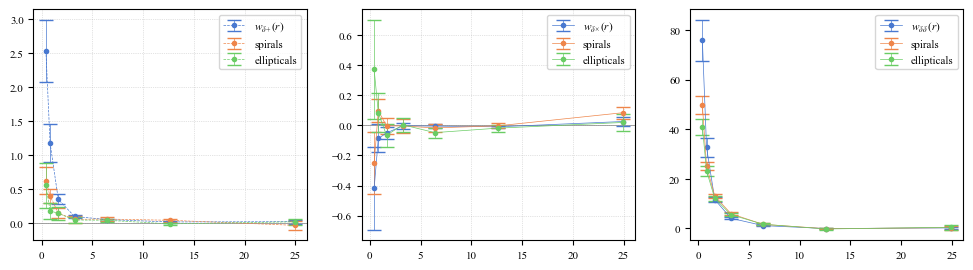

In [18]:
sqrtNz = np.sqrt(wdp_z_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_z,axis=0), yerr=np.std(wdp_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_spi,axis=0), yerr=np.std(wdp_z_spi,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'spirals', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_ell,axis=0), yerr=np.std(wdp_z_ell,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ellipticals', marker='o',markersize=3)
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_z,axis=0), yerr=np.std(wdx_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_spi,axis=0), yerr=np.std(wdx_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_ell,axis=0), yerr=np.std(wdx_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_z,axis=0), yerr=np.std(wdd_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_spi,axis=0), yerr=np.std(wdd_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_ell,axis=0), yerr=np.std(wdd_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

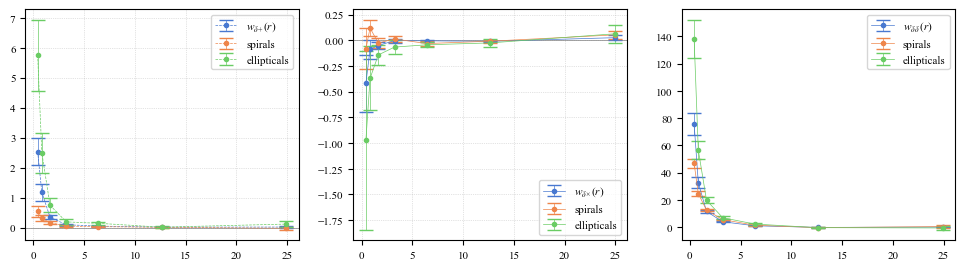

In [24]:
sqrtNz = np.sqrt(wdp_z_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_z,axis=0), yerr=np.std(wdp_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_spi,axis=0), yerr=np.std(wdp_z_spi,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'spirals', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_ell,axis=0), yerr=np.std(wdp_z_ell,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ellipticals', marker='o',markersize=3)
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_z,axis=0), yerr=np.std(wdx_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_spi,axis=0), yerr=np.std(wdx_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_ell,axis=0), yerr=np.std(wdx_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_z,axis=0), yerr=np.std(wdd_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_spi,axis=0), yerr=np.std(wdd_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_ell,axis=0), yerr=np.std(wdd_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

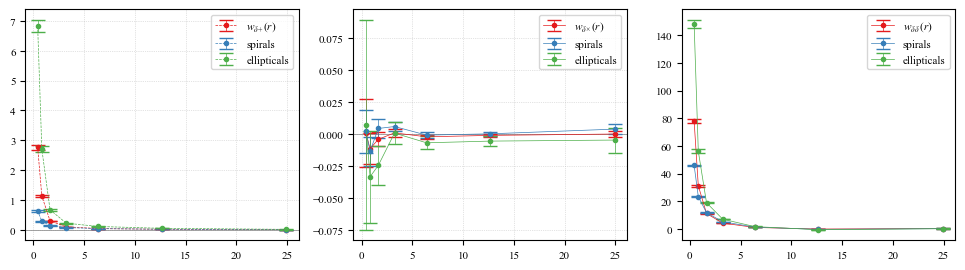

In [7]:
sqrtNz = np.sqrt(wdp_z_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_z,axis=0), yerr=np.std(wdp_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_spi,axis=0), yerr=np.std(wdp_z_spi,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'spirals', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_ell,axis=0), yerr=np.std(wdp_z_ell,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ellipticals', marker='o',markersize=3)
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_z,axis=0), yerr=np.std(wdx_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_spi,axis=0), yerr=np.std(wdx_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_ell,axis=0), yerr=np.std(wdx_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_z,axis=0), yerr=np.std(wdd_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_spi,axis=0), yerr=np.std(wdd_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_ell,axis=0), yerr=np.std(wdd_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

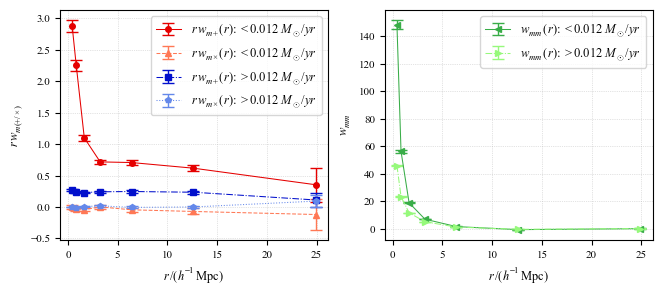

In [49]:
sqrtN = np.sqrt(wdp_z_spi.shape[0])
r_wdp_z_spi = wdp_z_spi*r
r_wdp_z_ell = wdp_z_ell*r
r_wdx_z_spi = wdx_z_spi*r
r_wdx_z_ell = wdx_z_ell*r
# r_wdd_z_spi = wdd_z_spi*r
# r_wdd_z_ell = wdd_z_ell*r

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20/3, 3))  # Width-to-height ratio adjusted for a clean layout
# ax[0].axhline(0, c='0.5', linewidth=1, linestyle='--')
ax[0].errorbar(
    r, np.mean(r_wdp_z_ell, axis=0), yerr=np.std(r_wdp_z_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:red',
    label=r'$r\,w_{m{+}}\,(r)$: $<0.012$ $M_\odot /yr$', marker='o', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdx_z_ell, axis=0), yerr=np.std(r_wdx_z_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=4,color='xkcd:melon',alpha=1.0,
    label=r'$r\,w_{m{\times}}\,(r)$: $<0.012$ $M_\odot /yr$', marker='^', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdp_z_spi, axis=0), yerr=np.std(r_wdp_z_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'$r\,w_{m{+}}\,(r)$: $>0.012$ $M_\odot /yr$', marker='s', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdx_z_spi, axis=0), yerr=np.std(r_wdx_z_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:soft blue',
    label=r'$r\,w_{m{\times}}\,(r)$: $>0.012$ $M_\odot /yr$', marker='p', markersize=4
)


# Plot the data for wdd
# ax[1].axhline(0, c='0.5', linewidth=1, linestyle='--')
ax[1].errorbar(
    r, np.mean(wdd_z_ell, axis=0), yerr=np.std(wdd_z_ell, axis=0) / sqrtN,
    linewidth=0.75, elinewidth=1, capsize=4, color='xkcd:medium green',
    label=r'$w_{mm}\,(r)$: $<0.012$ $M_\odot /yr$', marker='<', markersize=4
)
ax[1].errorbar(
    r, np.mean(wdd_z_spi, axis=0), yerr=np.std(wdd_z_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.',elinewidth=1, capsize=4, color='xkcd:light green',
    label=r'$w_{mm}\,(r)$: $>0.012$ $M_\odot /yr$', marker='>', markersize=4
)


# Grid and scaling
for axis in ax:
    axis.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#     axis.set_xscale('log')  # Example for log scale x-axis
#     axis.set_yscale('log')  # Example for log scale y-axis
#     axis.set_xlim(np.min(r) * 0.8, np.max(r) * 1.2)

# Adjust y-limits to be symmetric
# ax[0].set_ylim(
#     -0.1 * np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max()
# )
# ax[0].set_xlim(0,30)
# ax[1].set_ylim(
#     -0.1 * np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max()
# )
# ax[1].set_xlim(0,30)

# Axis labels and titles
ax[0].set_xlabel(r"$r \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[0].set_ylabel(r"$r\,w_{m(+/\times)}$",fontsize=9)
ax[0].legend(fontsize=9)

ax[1].set_xlabel(r"$r \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[1].set_ylabel(r"$w_{m m}$",fontsize=9)
ax[1].legend(fontsize=9)

# Adjust layout and save
fig.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/SFR corrs', dpi=300)